<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/Redes_neuronales_para_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020.csv


In [25]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-25-63b2ddeb0714>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [43]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"]]
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,NaN,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,NaN,1,1,1


In [44]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')
df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
0,3.0,0.0,9.0,1.0,1.0
1,3.0,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,2.0,1.0
3,3.0,0.0,1.0,1.0,1.0


In [45]:
# df["SEXO"] = df.SEXO.astype(str)
# df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
# df["PESO_NAC"] = df.PESO_NAC.astype(str)
# df["T_GES"] = df.T_GES.astype(str)
df["ASIS_MED"] = df.ASIS_MED.astype(str)
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
0,3.0,0.0,9.0,1.0,1.0
1,3.0,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,2.0,1.0
3,3.0,0.0,1.0,1.0,1.0


In [46]:
# df.loc[(df.SEXO == "3.0"), 'SEXO'] = "Indeterminado"
# df.loc[(df.SEXO == "1.0"), 'SEXO'] = "Masculino"
# df.loc[(df.SEXO == "2.0"), 'SEXO'] = "Femenino"
df.loc[(df.ASIS_MED == "3.0"), 'ASIS_MED'] = "Ignorado"
df.loc[(df.ASIS_MED == "1.0"), 'ASIS_MED'] = "Si"
df.loc[(df.ASIS_MED == "2.0"), 'ASIS_MED'] = "No"
print(df)

       SEXO  P_PMAN_IRIS  PESO_NAC  T_GES ASIS_MED
0       3.0          0.0       9.0    1.0       Si
1       3.0          0.0       1.0    1.0       Si
2       1.0          0.0       1.0    2.0       Si
3       3.0          0.0       1.0    1.0       Si
4       2.0          0.0       3.0    3.0       Si
...     ...          ...       ...    ...      ...
33322   3.0          0.0       1.0    1.0       Si
33323   3.0          0.0       9.0    1.0       Si
33324   3.0          0.0       9.0    1.0       Si
33325   3.0          0.0       1.0    1.0       Si
33326   3.0          0.0       1.0    1.0       Si

[33327 rows x 5 columns]


In [47]:
x = df.drop("ASIS_MED", axis=1)
y = df["ASIS_MED"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
trainX

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
7227,3.0,0.0,1.0,1.0
14854,3.0,0.0,9.0,9.0
2646,1.0,0.0,1.0,2.0
12634,2.0,0.0,6.0,4.0
25051,3.0,0.0,1.0,1.0
...,...,...,...,...
16871,3.0,0.0,1.0,1.0
9561,3.0,0.0,1.0,1.0
3344,3.0,0.0,9.0,1.0
8114,3.0,0.0,1.0,2.0


In [48]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)

In [49]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [50]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [52]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.97


In [53]:
no_obs = np.array([[2.0,	1.0,	1.0,	2.0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

In [54]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

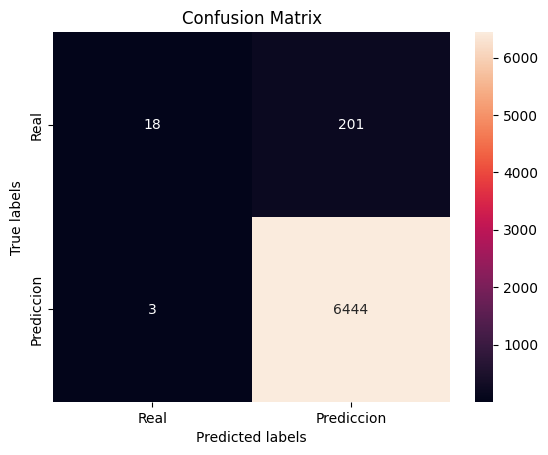

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Real', 'Prediccion']); ax.yaxis.set_ticklabels(['Real', 'Prediccion']);

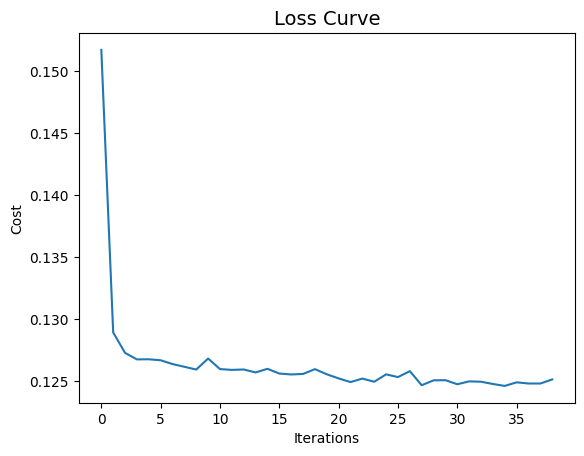

In [56]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [58]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [59]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [66]:
clf = MLPClassifier(hidden_layer_sizes=(3, 4, 10), activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.43


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
clf.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (3, 4, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

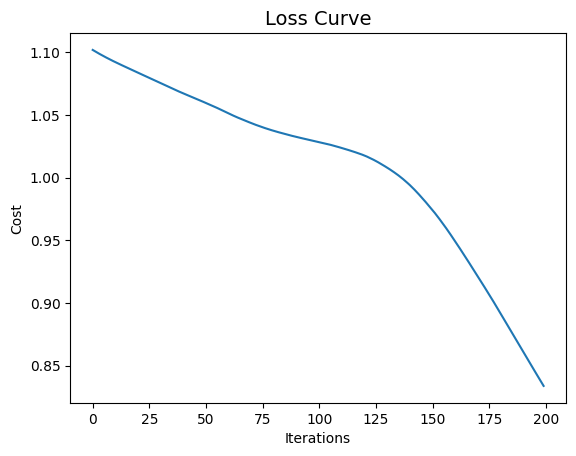

In [68]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()